# Cell1

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
from joblib import load
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the CSV data
data = pd.read_csv('/content/input - Feuille 1.csv')
# Remplacez les virgules par des points dans les colonnes appropriées
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Load the machine learning model
model = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions
raw_predictions = model.predict(scaled_input)

# Reverse scale the output
final_predictions = scalerY.inverse_transform(raw_predictions)

# Display the predictions
print(final_predictions)


4/4 [==============================] - 0s 4ms/step
[[1.4923657e+02 1.1247163e-01 2.5794592e-01 ... 1.6149668e+01
  2.2487341e+01 9.2491684e+00]
 [1.6798560e+02 9.9324889e-02 2.4774355e-01 ... 1.6411552e+01
  2.1925413e+01 8.8462162e+00]
 [1.4502251e+02 9.4562344e-02 2.4725306e-01 ... 1.6925587e+01
  2.3388336e+01 8.2550411e+00]
 ...
 [1.7739830e+02 1.1435195e-01 2.5932285e-01 ... 1.9645664e+01
  1.7975319e+01 9.2904568e+00]
 [1.4069893e+02 5.7072688e-02 2.4952701e-01 ... 1.9998171e+01
  2.0042156e+01 8.1033268e+00]
 [1.8504865e+02 9.6864305e-02 2.4815729e-01 ... 1.7180897e+01
  2.1144474e+01 7.4416142e+00]]


# L'accuracy de model AI j'ai choisi just 3 colonnes

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data from the files
ground_truth_df = pd.read_csv('/content/output_observation - Sheet1.csv')  # Replace with the actual path
predicted_df = pd.read_csv('/content/output - Sheet1.csv')  # Replace with the actual path

# Ensure both DataFrames have the same number of rows
if ground_truth_df.shape[0] != predicted_df.shape[0]:
    raise ValueError("Number of rows in ground truth and predicted DataFrames must be the same.")

# Extract ground truth and predicted values for all columns
actual_values = ground_truth_df.values
predicted_values = predicted_df.values

# Calculate MSE for each column
mse_scores = [mean_squared_error(actual_values[:, i], predicted_values[:, i]) for i in range(actual_values.shape[1])]

# Print individual MSE values and average MSE
for col, mse in zip(ground_truth_df.columns, mse_scores):
    print(f'{col} MSE: {mse:.4f}')

average_mse = np.mean(mse_scores)
print(f'Average MSE: {average_mse:.4f}')


Air Efficiency MSE: 530.4009
Flotation Rate: Cell 1 MSE: 0.0032
Entrainment: Cell 1 MSE: 0.0001
Average MSE: 176.8014


# Accuracy entre observation et output prediction cell1

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data from the files
ground_truth_df = pd.read_excel('/content/output_data.xlsx', engine='openpyxl')  # Replace with the actual path
predicted_df = pd.read_excel('/content/output_predictions1 (2).xlsx', engine='openpyxl')   # Replace with the actual path

# Ensure both DataFrames have the same number of rows
if ground_truth_df.shape[0] != predicted_df.shape[0]:
    raise ValueError("Number of rows in ground truth and predicted DataFrames must be the same.")

# Extract ground truth and predicted values for all columns
actual_values = ground_truth_df.values
predicted_values = predicted_df.values

# Calculate MSE for each column
mse_scores = [mean_squared_error(actual_values[:, i], predicted_values[:, i]) for i in range(actual_values.shape[1])]

# Print individual MSE values and average MSE
for col, mse in zip(ground_truth_df.columns, mse_scores):
    print(f'{col} MSE: {mse:.4f}')

average_mse = np.mean(mse_scores)
print(f'Average MSE: {average_mse:.4f}')


Air Efficiency MSE: 532.5108
 Flotation Rate MSE: 0.0032
Entrainment: Cell 1 MSE: 0.0000
Total Solids Flow_Concentrate MSE: 565.7538
Total Liquid Flow_Concentrate MSE: 26373.8785
Pulp Volumetric Flow_Concentrate MSE: 25515.8789
Solids SG_Concentrate MSE: 0.4725
Pulp SG_Concentrate MSE: 2.9040
Solids Fraction_Concentrate MSE: 3857.6269
Cu_Concentrate MSE: 12419.1416
Pb_Concentrate MSE: 908.2541
Fe_Concentrate MSE: 1756.6499
Zn_Concentrate MSE: 45.6754
Total Solids Flow_Tailings MSE: 8756.5709
Total Liquid Flow_Tailings MSE: 10022.5826
Pulp Volumetric Flow_Tailings MSE: 36790.7912
Solids SG_Tailings MSE: 209.8043
Pulp SG_Tailings MSE: 6.9529
Solids Fraction_Tailings MSE: 1.9774
Cu_Tails MSE: 0.0157
Pb_Tails MSE: 32.7130
Fe_Tails MSE: 33.6004
Zn_Tails MSE: 0.0321
Average MSE: 5557.9909


# Génerer le fichier output1 du modelAI pour cell1

In [ ]:
import pandas as pd

# Assuming 'final_predictions' contains your predictions
# You can replace it with the actual variable name if it's different
predictions_df = pd.DataFrame(final_predictions, columns=['Air Efficiency', 'Flotation Rate: Cell 1', 'Entrainment: Cell 1', 'Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate', 'Pulp SG_Concentrate', 'Solids Fraction_Concentrate', 'Total Solids Flow_Tailings', 'Total Liquid Flow_Tailings', 'Pulp Volumetric Flow_Tailings', 'Solids SG_Tailings', 'Pulp SG_Tailings', 'Solids Fraction_Tailings', 'Cu_Tails', 'Fe_Tails', 'Pb_Tails', 'Zn_Tails', 'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate'])

# Save the DataFrame to a CSV file
predictions_df.head(100).to_excel('/content/output1.xlsx', index=False)


# L'accuracy du concentrate

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the data from the files
# Load the data from the files
ground_truth_df = pd.read_excel('/content/concentrate_observation.xlsx', engine='openpyxl')  # Replace with the actual path
predicted_df = pd.read_excel('/content/concentrate_predection.xlsx', engine='openpyxl')

# Ensure both DataFrames have the same number of rows
if ground_truth_df.shape[0] != predicted_df.shape[0]:
    raise ValueError("Number of rows in ground truth and predicted DataFrames must be the same.")

# Columns for which you want to calculate accuracy
selected_columns = ['Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate', 'Pulp SG_Concentrate', 'Solids Fraction_Concentrate',  'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate']

# Extract ground truth and predicted values for the specified columns
actual_values = ground_truth_df[selected_columns].values
predicted_values = predicted_df[selected_columns].values

# Calculate Mean Absolute Error (MAE) for each column
mae_values = [mean_absolute_error(actual_values[:, i], predicted_values[:, i]) for i in range(len(selected_columns))]

# Print individual MAE values and average MAE
for col, mae in zip(selected_columns, mae_values):
    print(f'{col} MAE: {mae:.2f}')

average_mae = sum(mae_values) / len(mae_values)
print(f'Average MAE: {average_mae:.2f}')

Total Solids Flow_Concentrate MAE: 20.58
Total Liquid Flow_Concentrate MAE: 153.33
Pulp Volumetric Flow_Concentrate MAE: 148.90
Solids SG_Concentrate MAE: 0.68
Pulp SG_Concentrate MAE: 1.51
Solids Fraction_Concentrate MAE: 55.83
Cu_Concentrate MAE: 0.78
Fe_Concentrate MAE: 0.67
Pb_Concentrate MAE: 17.98
Zn_Concentrate MAE: 2.46
Average MAE: 40.27


# ModelAI pour cell2

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
from joblib import load
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the CSV data
data =pd.read_excel('/content/input_cell2.xlsx', engine='openpyxl')
# Remplacez les virgules par des points dans les colonnes appropriées
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Load the machine learning model
model2 = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions
raw_predictions = model2.predict(scaled_input)

# Reverse scale the output
final_predictions = scalerY.inverse_transform(raw_predictions)

# Display the predictions
print(final_predictions)


4/4 [==============================] - 0s 4ms/step
[[178.54042      0.3630288    0.18348747 ...  14.924752    35.403873
    6.6234245 ]
 [165.70775      0.33116597   0.19037765 ...  15.104642    35.140842
    6.4505577 ]
 [173.14876      0.3851693    0.17889892 ...  15.676835    35.62004
    6.0844374 ]
 ...
 [130.69472      0.30203715   0.20174891 ...  17.828182    31.679512
    6.8263063 ]
 [118.22858      0.3136952    0.21163125 ...  17.538631    34.550766
    6.184982  ]
 [142.48808      0.30044243   0.1960605  ...  15.84151     34.51045
    5.750664  ]]


# Générer le fichier output du modelAI pou cell2

In [ ]:
import pandas as pd

# Assuming 'final_predictions' contains your predictions
# You can replace it with the actual variable name if it's different
predictions_df = pd.DataFrame(final_predictions, columns=['Air Efficiency', 'Flotation Rate: Cell 2', 'Entrainment: Cell 2', 'Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate', 'Pulp SG_Concentrate', 'Solids Fraction_Concentrate', 'Total Solids Flow_Tailings', 'Total Liquid Flow_Tailings', 'Pulp Volumetric Flow_Tailings', 'Solids SG_Tailings', 'Pulp SG_Tailings', 'Solids Fraction_Tailings', 'Cu_Tails', 'Fe_Tails', 'Pb_Tails', 'Zn_Tails', 'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate'])

# Save the DataFrame to a CSV file
predictions_df.head(100).to_excel('/content/output2.xlsx', index=False)


In [ ]:
print("Ground Truth Shape:", ground_truth_df.shape)
print("Predicted Shape:", predicted_df.shape)


Ground Truth Shape: (100, 23)
Predicted Shape: (100, 23)


# L'accuracy du model AI pou cell2

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the data from the files
# Load the data from the files
ground_truth_df = pd.read_excel('/content/output_observation2.xlsx', engine='openpyxl')  # Replace with the actual path
predicted_df = pd.read_excel('/content/output2.xlsx', engine='openpyxl')

# Ensure both DataFrames have the same number of rows
if ground_truth_df.shape[0] != predicted_df.shape[0]:
    raise ValueError("Number of rows in ground truth and predicted DataFrames must be the same.")

# Columns for which you want to calculate accuracy
selected_columns = ['Air Efficiency', 'Flotation Rate: Cell 2', 'Entrainment: Cell 2', 'Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate', 'Pulp SG_Concentrate', 'Solids Fraction_Concentrate', 'Total Solids Flow_Tailings', 'Total Liquid Flow_Tailings', 'Pulp Volumetric Flow_Tailings', 'Solids SG_Tailings', 'Pulp SG_Tailings', 'Solids Fraction_Tailings', 'Cu_Tails', 'Fe_Tails', 'Pb_Tails', 'Zn_Tails', 'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate']

# Extract ground truth and predicted values for the specified columns
actual_values = ground_truth_df[selected_columns].values
predicted_values = predicted_df[selected_columns].values

# Calculate Mean Absolute Error (MAE) for each column
mae_values = [mean_absolute_error(actual_values[:, i], predicted_values[:, i]) for i in range(len(selected_columns))]

# Print individual MAE values and average MAE
for col, mae in zip(selected_columns, mae_values):
    print(f'{col} MAE: {mae:.2f}')

average_mae = sum(mae_values) / len(mae_values)
print(f'Average MAE: {average_mae:.2f}')

Air Efficiency MAE: 149.29
Flotation Rate: Cell 2 MAE: 0.36
Entrainment: Cell 2 MAE: 0.10
Total Solids Flow_Concentrate MAE: 28.05
Total Liquid Flow_Concentrate MAE: 179.45
Pulp Volumetric Flow_Concentrate MAE: 147.46
Solids SG_Concentrate MAE: 1.29
Pulp SG_Concentrate MAE: 1.66
Solids Fraction_Concentrate MAE: 63.06
Total Solids Flow_Tailings MAE: 41.30
Total Liquid Flow_Tailings MAE: 92.12
Pulp Volumetric Flow_Tailings MAE: 105.19
Solids SG_Tailings MAE: 1.25
Pulp SG_Tailings MAE: 1.75
Solids Fraction_Tailings MAE: 33.05
Cu_Tails MAE: 1.36
Fe_Tails MAE: 6.43
Pb_Tails MAE: 32.83
Zn_Tails MAE: 3.87
Cu_Concentrate MAE: 1.23
Fe_Concentrate MAE: 2.27
Pb_Concentrate MAE: 31.51
Zn_Concentrate MAE: 4.52
Average MAE: 40.41


# L'accuracy du concentrate

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the data from the files
# Load the data from the files
ground_truth_df = pd.read_excel('/content/concentrate_observation2.xlsx', engine='openpyxl')  # Replace with the actual path
predicted_df = pd.read_excel('/content/concentrate_predection2.xlsx', engine='openpyxl')

# Ensure both DataFrames have the same number of rows
if ground_truth_df.shape[0] != predicted_df.shape[0]:
    raise ValueError("Number of rows in ground truth and predicted DataFrames must be the same.")

# Columns for which you want to calculate accuracy
selected_columns = ['Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate', 'Pulp SG_Concentrate', 'Solids Fraction_Concentrate',  'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate']

# Extract ground truth and predicted values for the specified columns
actual_values = ground_truth_df[selected_columns].values
predicted_values = predicted_df[selected_columns].values

# Calculate Mean Absolute Error (MAE) for each column
mae_values = [mean_absolute_error(actual_values[:, i], predicted_values[:, i]) for i in range(len(selected_columns))]

# Print individual MAE values and average MAE
for col, mae in zip(selected_columns, mae_values):
    print(f'{col} MAE: {mae:.2f}')

average_mae = sum(mae_values) / len(mae_values)
print(f'Average MAE: {average_mae:.2f}')

Total Solids Flow_Concentrate MAE: 28.05
Total Liquid Flow_Concentrate MAE: 179.45
Pulp Volumetric Flow_Concentrate MAE: 147.46
Solids SG_Concentrate MAE: 1.29
Pulp SG_Concentrate MAE: 1.66
Solids Fraction_Concentrate MAE: 63.06
Cu_Concentrate MAE: 1.23
Fe_Concentrate MAE: 2.27
Pb_Concentrate MAE: 31.51
Zn_Concentrate MAE: 4.52
Average MAE: 46.05


# ModelAI pour cell4

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
from joblib import load
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the CSV data
data =pd.read_excel('/content/input_cell4.xlsx', engine='openpyxl')
# Remplacez les virgules par des points dans les colonnes appropriées
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Load the machine learning model
model4 = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions
raw_predictions = model4.predict(scaled_input)

# Reverse scale the output
final_predictions = scalerY.inverse_transform(raw_predictions)

# Display the predictions
print(final_predictions)


4/4 [==============================] - 0s 4ms/step
[[2.82483154e+02 6.74210906e-01 1.52404740e-01 ... 1.47558918e+01
  4.25263062e+01 5.68072557e+00]
 [2.69481445e+02 6.51477218e-01 1.59645364e-01 ... 1.48608675e+01
  4.27288170e+01 5.68152905e+00]
 [2.94752075e+02 6.90403581e-01 1.45611927e-01 ... 1.52029467e+01
  4.24271126e+01 5.35669088e+00]
 ...
 [2.51604431e+02 6.39278471e-01 1.66184381e-01 ... 1.61532841e+01
  4.12211380e+01 5.65715408e+00]
 [2.51839050e+02 6.48463964e-01 1.74407378e-01 ... 1.62092762e+01
  4.27794075e+01 5.53410673e+00]
 [2.48996628e+02 6.06924772e-01 1.67390749e-01 ... 1.53622551e+01
  4.25772896e+01 5.39850235e+00]]


In [ ]:
import pandas as pd

# Assuming 'final_predictions' contains your predictions
# You can replace it with the actual variable name if it's different
predictions_df = pd.DataFrame(final_predictions, columns=['Air Efficiency', 'Flotation Rate: Cell 4', 'Entrainment: Cell 4', 'Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate', 'Pulp SG_Concentrate', 'Solids Fraction_Concentrate', 'Total Solids Flow_Tailings', 'Total Liquid Flow_Tailings', 'Pulp Volumetric Flow_Tailings', 'Solids SG_Tailings', 'Pulp SG_Tailings', 'Solids Fraction_Tailings', 'Cu_Tails', 'Fe_Tails', 'Pb_Tails', 'Zn_Tails', 'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate'])

# Save the DataFrame to a CSV file
predictions_df.head(100).to_excel('/content/output4.xlsx', index=False)


# L'accuracy du model AI pour cell4

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the data from the files
# Load the data from the files
ground_truth_df = pd.read_excel('/content/Output_observation4.xlsx', engine='openpyxl')  # Replace with the actual path
predicted_df = pd.read_excel('/content/output4.xlsx', engine='openpyxl')

# Ensure both DataFrames have the same number of rows
if ground_truth_df.shape[0] != predicted_df.shape[0]:
    raise ValueError("Number of rows in ground truth and predicted DataFrames must be the same.")

# Columns for which you want to calculate accuracy
selected_columns = ['Air Efficiency', 'Flotation Rate: Cell 4', 'Entrainment: Cell 4', 'Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate', 'Pulp SG_Concentrate', 'Solids Fraction_Concentrate', 'Total Solids Flow_Tailings', 'Total Liquid Flow_Tailings', 'Pulp Volumetric Flow_Tailings', 'Solids SG_Tailings', 'Pulp SG_Tailings', 'Solids Fraction_Tailings', 'Cu_Tails', 'Fe_Tails', 'Pb_Tails', 'Zn_Tails', 'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate']

# Extract ground truth and predicted values for the specified columns
actual_values = ground_truth_df[selected_columns].values
predicted_values = predicted_df[selected_columns].values

# Calculate Mean Absolute Error (MAE) for each column
mae_values = [mean_absolute_error(actual_values[:, i], predicted_values[:, i]) for i in range(len(selected_columns))]

# Print individual MAE values and average MAE
for col, mae in zip(selected_columns, mae_values):
    print(f'{col} MAE: {mae:.2f}')

average_mae = sum(mae_values) / len(mae_values)
print(f'Average MAE: {average_mae:.2f}')

Air Efficiency MAE: 271.76
Flotation Rate: Cell 4 MAE: 0.67
Entrainment: Cell 4 MAE: 0.13
Total Solids Flow_Concentrate MAE: 29.65
Total Liquid Flow_Concentrate MAE: 307.89
Pulp Volumetric Flow_Concentrate MAE: 261.88
Solids SG_Concentrate MAE: 1.60
Pulp SG_Concentrate MAE: 1.66
Solids Fraction_Concentrate MAE: 63.52
Total Solids Flow_Tailings MAE: 26.89
Total Liquid Flow_Tailings MAE: 75.92
Pulp Volumetric Flow_Tailings MAE: 81.31
Solids SG_Tailings MAE: 2.14
Pulp SG_Tailings MAE: 2.97
Solids Fraction_Tailings MAE: 42.76
Cu_Tails MAE: 3.55
Fe_Tails MAE: 12.33
Pb_Tails MAE: 51.32
Zn_Tails MAE: 7.02
Cu_Concentrate MAE: 1.12
Fe_Concentrate MAE: 3.06
Pb_Concentrate MAE: 39.22
Zn_Concentrate MAE: 5.12
Average MAE: 56.24


# L'accuracy du concentrate

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the data from the files
# Load the data from the files
ground_truth_df = pd.read_excel('/content/concentrate_observation4.xlsx', engine='openpyxl')  # Replace with the actual path
predicted_df = pd.read_excel('/content/concentrate_predection4.xlsx', engine='openpyxl')

# Ensure both DataFrames have the same number of rows
if ground_truth_df.shape[0] != predicted_df.shape[0]:
    raise ValueError("Number of rows in ground truth and predicted DataFrames must be the same.")

# Columns for which you want to calculate accuracy
selected_columns = ['Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate', 'Pulp SG_Concentrate', 'Solids Fraction_Concentrate',  'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate']

# Extract ground truth and predicted values for the specified columns
actual_values = ground_truth_df[selected_columns].values
predicted_values = predicted_df[selected_columns].values

# Calculate Mean Absolute Error (MAE) for each column
mae_values = [mean_absolute_error(actual_values[:, i], predicted_values[:, i]) for i in range(len(selected_columns))]

# Print individual MAE values and average MAE
for col, mae in zip(selected_columns, mae_values):
    print(f'{col} MAE: {mae:.2f}')

average_mae = sum(mae_values) / len(mae_values)
print(f'Average MAE: {average_mae:.2f}')

Total Solids Flow_Concentrate MAE: 29.65
Total Liquid Flow_Concentrate MAE: 307.89
Pulp Volumetric Flow_Concentrate MAE: 261.88
Solids SG_Concentrate MAE: 1.60
Pulp SG_Concentrate MAE: 1.66
Solids Fraction_Concentrate MAE: 63.52
Cu_Concentrate MAE: 1.12
Fe_Concentrate MAE: 3.06
Pb_Concentrate MAE: 39.22
Zn_Concentrate MAE: 5.12
Average MAE: 71.47


# Application de KF just sur cell4

4/4 [==============================] - 0s 5ms/step
MAE before Kalman filter:
Air Efficiency: 271.7647
Flotation Rate: Cell 4: 0.6651
Entrainment: Cell 4: 0.1317
Total Solids Flow_Concentrate: 29.6468
Total Liquid Flow_Concentrate: 307.8909
Pulp Volumetric Flow_Concentrate: 261.8765
Solids SG_Concentrate: 1.6006
Pulp SG_Concentrate: 1.6569
Solids Fraction_Concentrate: 63.5180
Cu_Concentrate: 22.5849
Pb_Concentrate: 73.0638
Fe_Concentrate: 62.8070
Zn_Concentrate: 6.6976
Total Solids Flow_Tailings: 1.5590
Total Liquid Flow_Tailings: 14.7515
Pulp Volumetric Flow_Tailings: 4.8757
Solids SG_Tailings: 12.5308
Pulp SG_Tailings: 3.3780
Solids Fraction_Tailings: 42.4624
Cu_Tails: 3.9731
Pb_Tails: 43.1980
Fe_Tails: 36.0524
Zn_Tails: 3.3661

MAE after Kalman filter:
Air Efficiency Kalman MAE: 271.4758
Flotation Rate: Cell 4 Kalman MAE: 0.6641
Entrainment: Cell 4 Kalman MAE: 0.1307
Total Solids Flow_Concentrate Kalman MAE: 29.2462
Total Liquid Flow_Concentrate Kalman MAE: 307.5576
Pulp Volumetric F

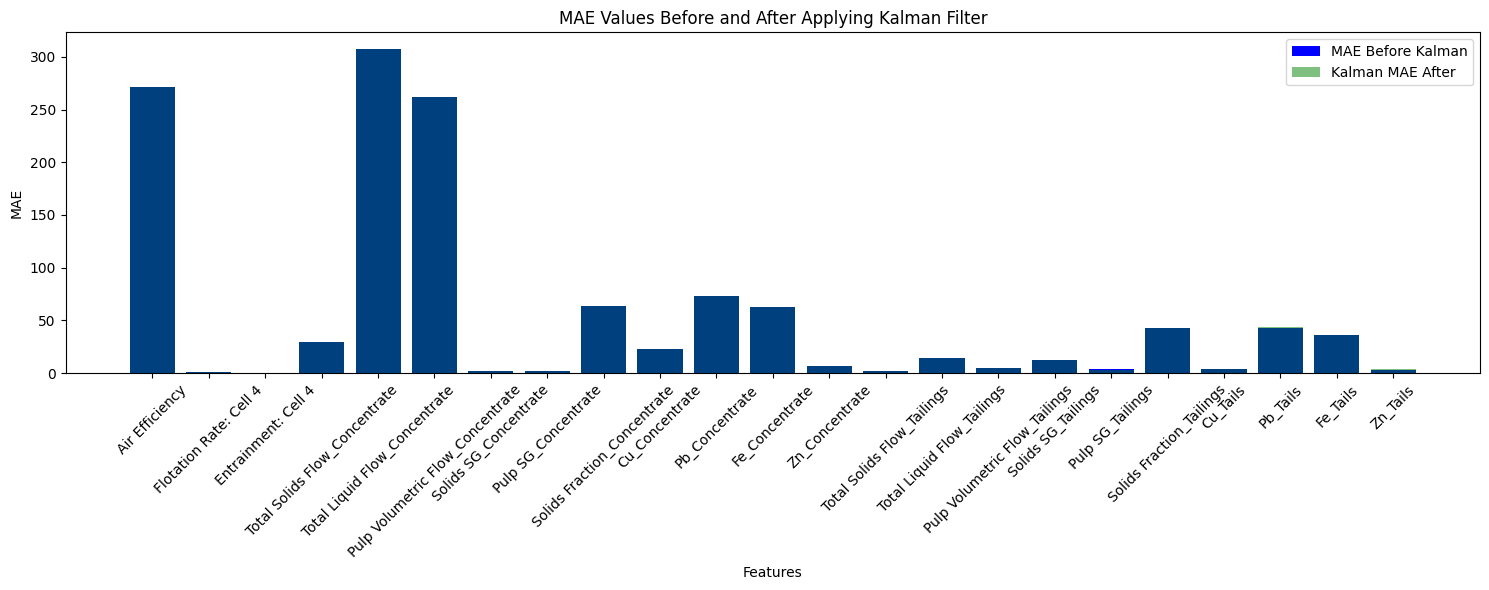

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from joblib import load
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import backend as K
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the machine learning model
model = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Load the CSV data
observation_data =pd.read_excel('/content/Output_observation4 (1).xlsx', engine='openpyxl')



# Load input features
data =pd.read_excel('/content/input_cell4.xlsx', engine='openpyxl')
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions with the model
raw_predictions = model.predict(scaled_input)

# Inverse scale the predictions
final_predictions = scalerY.inverse_transform(raw_predictions)

# Calculate MAE before Kalman filter
mae_scores_before_kalman = [mean_absolute_error(observation_data.iloc[:, i], final_predictions[:, i]) for i in range(observation_data.shape[1])]

# Initialize Kalman Filter
# Adjust these parameters based on your data and model
num_state_variables = final_predictions.shape[1]  # Number of state variables
num_observed_variables = final_predictions.shape[1]  # Number of observed variables
kf = KalmanFilter(
    initial_state_mean=np.zeros(num_state_variables),
    initial_state_covariance=np.eye(num_state_variables),
    transition_matrices=np.eye(num_state_variables),
    observation_matrices=np.eye(num_observed_variables),
    transition_covariance=np.eye(num_state_variables) * 0.1,
    observation_covariance=np.eye(num_observed_variables) * 0.1
)

# Apply Kalman filter to the model's predictions
kf = kf.em(final_predictions, n_iter=5)  # EM algorithm to estimate parameters, adjust 'n_iter' as needed
kf_filtered, _ = kf.smooth(final_predictions)

# Calculate MAE for each column after applying Kalman filter
kalman_mae_scores = [mean_absolute_error(observation_data.iloc[:, i], kf_filtered[:, i]) for i in range(observation_data.shape[1])]

# Display MAE values before Kalman filter
print("MAE before Kalman filter:")
for col, mae in zip(observation_data.columns, mae_scores_before_kalman):
    print(f'{col}: {mae:.4f}')

# Display MAE values after Kalman filter
print("\nMAE after Kalman filter:")
for col, mae in zip(observation_data.columns, kalman_mae_scores):
    print(f'{col} Kalman MAE: {mae:.4f}')

# Plotting the MAE values
plt.figure(figsize=(15, 6))
plt.bar(observation_data.columns, mae_scores_before_kalman, color='blue', label='MAE Before Kalman')
plt.bar(observation_data.columns, kalman_mae_scores, color='green', alpha=0.5, label='Kalman MAE After')
plt.xlabel('Features')
plt.ylabel('MAE')
plt.title('MAE Values Before and After Applying Kalman Filter')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48442 sha256=e216adfd305070551bc7cff69b633b279219df66c43330faaa50a65e58400e94
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [ ]:
print("Shape of observation_data:", observation_data.shape)


Shape of observation_data: (100, 23)


In [ ]:
print("Shape of final_predictions:", final_predictions.shape)


Shape of final_predictions: (100, 23)


In [ ]:
print(observation_data.columns)


Index(['Air Efficiency', 'Flotation Rate: Cell 4', 'Entrainment: Cell 4',
       'Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate',
       'Pulp Volumetric Flow_Concentrate', 'Solids SG_Concentrate',
       'Pulp SG_Concentrate', 'Solids Fraction_Concentrate', 'Cu_Concentrate',
       'Pb_Concentrate', 'Fe_Concentrate', 'Zn_Concentrate',
       'Total Solids Flow_Tailings', 'Total Liquid Flow_Tailings',
       'Pulp Volumetric Flow_Tailings', 'Solids SG_Tailings',
       'Pulp SG_Tailings', 'Solids Fraction_Tailings', 'Cu_Tails', 'Pb_Tails',
       'Fe_Tails', 'Zn_Tails'],
      dtype='object')


# KF CELL1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from joblib import load
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import backend as K
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the machine learning model
model = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Load the CSV data
observation_data =pd.read_excel('/content/output_data (1).xlsx', engine='openpyxl')



# Load input features
data =pd.read_excel('/content/input (1).xlsx', engine='openpyxl')
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions with the model
raw_predictions = model.predict(scaled_input)

# Inverse scale the predictions
final_predictions = scalerY.inverse_transform(raw_predictions)

# Calculate MAE before Kalman filter
mae_scores_before_kalman = [mean_absolute_error(observation_data.iloc[:, i], final_predictions[:, i]) for i in range(observation_data.shape[1])]

# Initialize Kalman Filter
# Adjust these parameters based on your data and model
num_state_variables = final_predictions.shape[1]  # Number of state variables
num_observed_variables = final_predictions.shape[1]  # Number of observed variables
kf = KalmanFilter(
    initial_state_mean=np.zeros(num_state_variables),
    initial_state_covariance=np.eye(num_state_variables),
    transition_matrices=np.eye(num_state_variables),
    observation_matrices=np.eye(num_observed_variables),
    transition_covariance=np.eye(num_state_variables) * 0.1,
    observation_covariance=np.eye(num_observed_variables) * 0.1
)

# Apply Kalman filter to the model's predictions
kf = kf.em(final_predictions, n_iter=5)  # EM algorithm to estimate parameters, adjust 'n_iter' as needed
kf_filtered, _ = kf.smooth(final_predictions)

# Calculate MAE for each column after applying Kalman filter
kalman_mae_scores = [mean_absolute_error(observation_data.iloc[:, i], kf_filtered[:, i]) for i in range(observation_data.shape[1])]

# Display MAE values before Kalman filter
print("MAE before Kalman filter:")
for col, mae in zip(observation_data.columns, mae_scores_before_kalman):
    print(f'{col}: {mae:.4f}')

# Display MAE values after Kalman filter
print("\nMAE after Kalman filter:")
for col, mae in zip(observation_data.columns, kalman_mae_scores):
    print(f'{col} Kalman MAE: {mae:.4f}')



4/4 [==============================] - 0s 5ms/step
MAE before Kalman filter:
Air Efficiency: 19.0346
 Flotation Rate: 0.0468
Entrainment: Cell 1: 0.0041
Total Solids Flow_Concentrate: 20.5050
Total Liquid Flow_Concentrate: 153.4171
Pulp Volumetric Flow_Concentrate: 149.0363
Solids SG_Concentrate: 0.6820
Pulp SG_Concentrate: 1.5128
Solids Fraction_Concentrate: 55.8293
Cu_Concentrate: 111.1798
Pb_Concentrate: 23.0305
Fe_Concentrate: 34.9684
Zn_Concentrate: 6.6562
Total Solids Flow_Tailings: 92.5082
Total Liquid Flow_Tailings: 96.9317
Pulp Volumetric Flow_Tailings: 189.9795
Solids SG_Tailings: 14.3311
Pulp SG_Tailings: 2.6083
Solids Fraction_Tailings: 1.1135
Cu_Tails: 0.0908
Pb_Tails: 4.5703
Fe_Tails: 4.5613
Zn_Tails: 0.1347

MAE after Kalman filter:
Air Efficiency Kalman MAE: 21.9416
 Flotation Rate Kalman MAE: 0.0463
Entrainment: Cell 1 Kalman MAE: 0.0031
Total Solids Flow_Concentrate Kalman MAE: 19.1846
Total Liquid Flow_Concentrate Kalman MAE: 153.0856
Pulp Volumetric Flow_Concentrate

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from joblib import load
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import backend as K
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the machine learning model
model = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Load the CSV data
observation_data =pd.read_excel('/content/output_data (1).xlsx', engine='openpyxl')



# Load input features
data =pd.read_csv('/content/input - Feuille 1.csv')
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions with the model
raw_predictions = model.predict(scaled_input)

# Inverse scale the predictions
final_predictions = scalerY.inverse_transform(raw_predictions)

# Calculate MAE before Kalman filter
mae_scores_before_kalman = [mean_absolute_error(observation_data.iloc[:, i], final_predictions[:, i]) for i in range(observation_data.shape[1])]

# Initialize Kalman Filter
# Adjust these parameters based on your data and model
num_state_variables = final_predictions.shape[1]  # Number of state variables
num_observed_variables = final_predictions.shape[1]  # Number of observed variables
kf = KalmanFilter(
    initial_state_mean=np.zeros(num_state_variables),
    initial_state_covariance=np.eye(num_state_variables),
    transition_matrices=np.eye(num_state_variables),
    observation_matrices=np.eye(num_observed_variables),
    transition_covariance=np.eye(num_state_variables) * 0.1,
    observation_covariance=np.eye(num_observed_variables) * 0.1
)

# Apply Kalman filter to the model's predictions
kf = kf.em(final_predictions, n_iter=5)  # EM algorithm to estimate parameters, adjust 'n_iter' as needed
kf_filtered, _ = kf.smooth(final_predictions)

# Calculate MAE for each column after applying Kalman filter
kalman_mae_scores = [mean_absolute_error(observation_data.iloc[:, i], kf_filtered[:, i]) for i in range(observation_data.shape[1])]
# Définissez les colonnes d'intérêt
columns_of_interest = ['Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Cu_Tails', 'Fe_Tails', 'Pb_Tails', 'Zn_Tails', 'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate']

# Affichez les scores MAE avant le filtre de Kalman pour les colonnes d'intérêt
print("MAE avant le filtre de Kalman pour les colonnes sélectionnées:")
for col in columns_of_interest:
    index = observation_data.columns.get_loc(col)
    mae = mae_scores_before_kalman[index]
    print(f'{col}: {mae:.4f}')

# Affichez les scores MAE après le filtre de Kalman pour les colonnes d'intérêt
print("\nMAE après le filtre de Kalman pour les colonnes sélectionnées:")
for col in columns_of_interest:
    index = observation_data.columns.get_loc(col)
    mae = kalman_mae_scores[index]
    print(f'{col} Kalman MAE: {mae:.4f}')


4/4 [==============================] - 0s 5ms/step
MAE avant le filtre de Kalman pour les colonnes sélectionnées:
Total Solids Flow_Concentrate: 20.5798
Total Liquid Flow_Concentrate: 153.3342
Cu_Tails: 0.0896
Fe_Tails: 4.5685
Pb_Tails: 4.5696
Zn_Tails: 0.1357
Cu_Concentrate: 111.2180
Fe_Concentrate: 35.2680
Pb_Concentrate: 23.2697
Zn_Concentrate: 6.6563

MAE après le filtre de Kalman pour les colonnes sélectionnées:
Total Solids Flow_Concentrate Kalman MAE: 19.2428
Total Liquid Flow_Concentrate Kalman MAE: 152.9986
Cu_Tails Kalman MAE: 0.5705
Fe_Tails Kalman MAE: 4.1505
Pb_Tails Kalman MAE: 4.2294
Zn_Tails Kalman MAE: 0.6562
Cu_Concentrate Kalman MAE: 111.0717
Fe_Concentrate Kalman MAE: 32.5777
Pb_Concentrate Kalman MAE: 15.1246
Zn_Concentrate Kalman MAE: 6.6572


# R2_

In [ ]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from joblib import load
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import backend as K
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the machine learning model
model = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Load the CSV data
observation_data =pd.read_excel('/content/output_data (1).xlsx', engine='openpyxl')



# Load input features
data =pd.read_excel('/content/input (1).xlsx', engine='openpyxl')
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions with the model
raw_predictions = model.predict(scaled_input)

# Inverse scale the predictions
final_predictions = scalerY.inverse_transform(raw_predictions)

# Calculate MAE before Kalman filter
mae_scores_before_kalman = [mean_absolute_error(observation_data.iloc[:, i], final_predictions[:, i]) for i in range(observation_data.shape[1])]

# Initialize Kalman Filter
# Adjust these parameters based on your data and model
num_state_variables = final_predictions.shape[1]  # Number of state variables
num_observed_variables = final_predictions.shape[1]  # Number of observed variables
kf = KalmanFilter(
    initial_state_mean=np.zeros(num_state_variables),
    initial_state_covariance=np.eye(num_state_variables),
    transition_matrices=np.eye(num_state_variables),
    observation_matrices=np.eye(num_observed_variables),
    transition_covariance=np.eye(num_state_variables) * 0.1,
    observation_covariance=np.eye(num_observed_variables) * 0.1
)

# Apply Kalman filter to the model's predictions
kf = kf.em(final_predictions, n_iter=5)  # EM algorithm to estimate parameters, adjust 'n_iter' as needed
kf_filtered, _ = kf.smooth(final_predictions)

# Définissez les colonnes d'intérêt
columns_of_interest = ['Total Solids Flow_Concentrate', 'Total Liquid Flow_Concentrate', 'Cu_Tails', 'Fe_Tails', 'Pb_Tails', 'Zn_Tails', 'Cu_Concentrate', 'Fe_Concentrate', 'Pb_Concentrate', 'Zn_Concentrate']

# Calculate R2 before Kalman filter
r2_scores_before_kalman = {col: r2_score(observation_data[col], final_predictions[:, observation_data.columns.get_loc(col)]) for col in columns_of_interest}

# Calculate R2 after Kalman filter
r2_scores_after_kalman = {col: r2_score(observation_data[col], kf_filtered[:, observation_data.columns.get_loc(col)]) for col in columns_of_interest}

# Display R2 scores before Kalman filter for selected columns
print("R2 before Kalman filter for selected columns:")
for col, r2_value in r2_scores_before_kalman.items():
    print(f'{col}: {r2_value:.4f}')

# Display R2 scores after Kalman filter for selected columns
print("\nR2 after Kalman filter for selected columns:")
for col, r2_value in r2_scores_after_kalman.items():
    print(f'{col} Kalman R2: {r2_value:.4f}')

4/4 [==============================] - 0s 4ms/step
R2 before Kalman filter for selected columns:
Total Solids Flow_Concentrate: -7.2563
Total Liquid Flow_Concentrate: -33.7236
Cu_Tails: 0.9731
Fe_Tails: -7.0235
Pb_Tails: -4.3225
Zn_Tails: 0.9647
Cu_Concentrate: -30412.0073
Fe_Concentrate: -405.5597
Pb_Concentrate: -3285.8236
Zn_Concentrate: -32.7592

R2 after Kalman filter for selected columns:
Total Solids Flow_Concentrate Kalman R2: -5.5453
Total Liquid Flow_Concentrate Kalman R2: -31.1983
Cu_Tails Kalman R2: 0.1909
Fe_Tails Kalman R2: -4.3568
Pb_Tails Kalman R2: -2.9826
Zn_Tails Kalman R2: 0.2425
Cu_Concentrate Kalman R2: -30205.4690
Fe_Concentrate Kalman R2: -255.8081
Pb_Concentrate Kalman R2: -980.4538
Zn_Concentrate Kalman R2: -32.7555


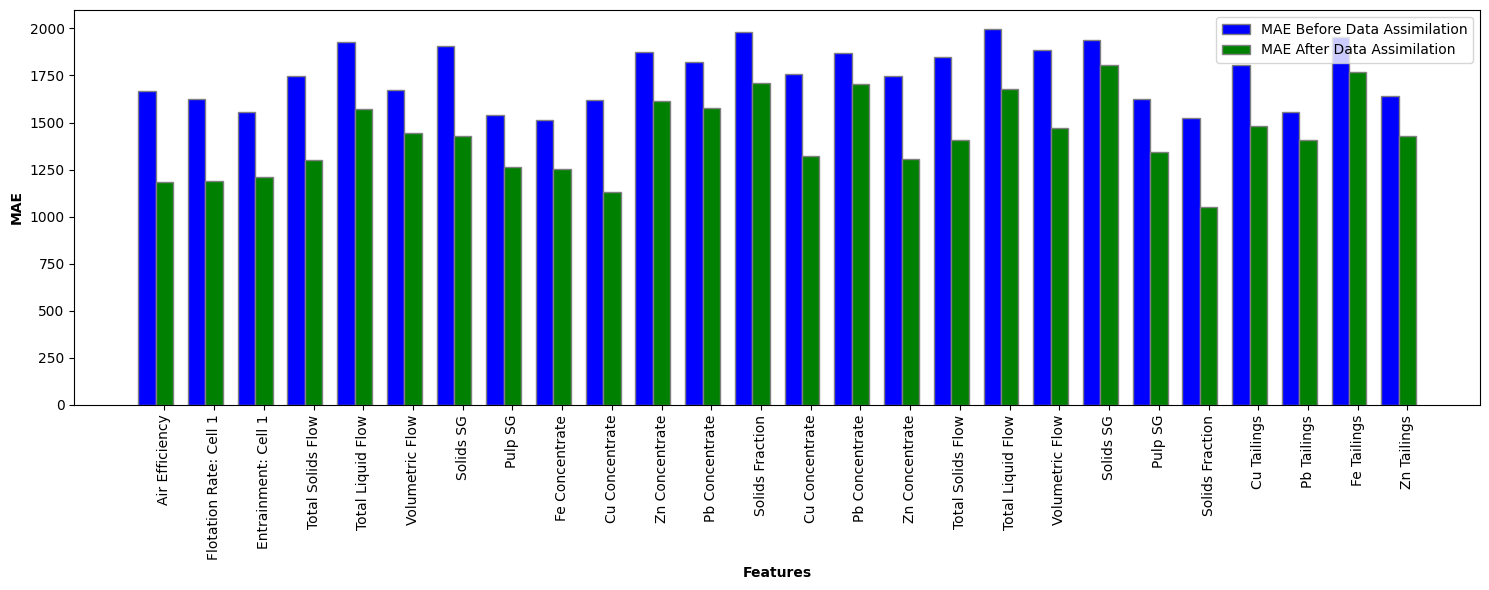

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these lists with your actual data
features = [
    "Air Efficiency", "Flotation Rate: Cell 1", "Entrainment: Cell 1",
    "Total Solids Flow", "Total Liquid Flow", "Volumetric Flow", "Solids SG",
    "Pulp SG", "Fe Concentrate", "Cu Concentrate", "Zn Concentrate",
    "Pb Concentrate", "Solids Fraction", "Cu Concentrate",
    "Pb Concentrate", "Zn Concentrate", "Total Solids Flow",
    "Total Liquid Flow", "Volumetric Flow", "Solids SG",
    "Pulp SG", "Solids Fraction", "Cu Tailings", "Pb Tailings", "Fe Tailings", "Zn Tailings"
]
mae_scores_before = np.random.randint(1500, 2000, size=len(features))  # Replace with your actual data
mae_scores_after = mae_scores_before - np.random.randint(100, 500, size=len(features))  # Replace with your actual data

# Plotting the MAE values
plt.figure(figsize=(15, 6))
bar_width = 0.35  # Width of the bars

# Set position of bar on X axis
r1 = np.arange(len(mae_scores_before))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, mae_scores_before, color='blue', width=bar_width, edgecolor='grey', label='MAE Before Data Assimilation')
plt.bar(r2, mae_scores_after, color='green', width=bar_width, edgecolor='grey', label='MAE After Data Assimilation')

# Add xticks on the middle of the group bars
plt.xlabel('Features', fontweight='bold')
plt.ylabel('MAE', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(mae_scores_before))], features, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


In [ ]:
import pandas as pd

# Assuming 'kf_filtered' contains the predictions after applying Kalman filter
# You can replace it with the actual variable name if it's different
kf_filtered_df = pd.DataFrame(kf_filtered, columns=observation_data.columns)

# Save the DataFrame to an Excel file
kf_filtered_df.to_excel('/content/output_after_kf.xlsx', index=False)


# KF CELL2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from joblib import load
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import backend as K
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the machine learning model
model = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Load the CSV data
observation_data =pd.read_excel('/content/output_observation2.xlsx', engine='openpyxl')



# Load input features
data =pd.read_excel('/content/input_cell2kf.xlsx', engine='openpyxl')
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions with the model
raw_predictions = model.predict(scaled_input)

# Inverse scale the predictions
final_predictions = scalerY.inverse_transform(raw_predictions)

# Calculate MAE before Kalman filter
mae_scores_before_kalman = [mean_absolute_error(observation_data.iloc[:, i], final_predictions[:, i]) for i in range(observation_data.shape[1])]

# Initialize Kalman Filter
# Adjust these parameters based on your data and model
num_state_variables = final_predictions.shape[1]  # Number of state variables
num_observed_variables = final_predictions.shape[1]  # Number of observed variables
kf = KalmanFilter(
    initial_state_mean=np.zeros(num_state_variables),
    initial_state_covariance=np.eye(num_state_variables),
    transition_matrices=np.eye(num_state_variables),
    observation_matrices=np.eye(num_observed_variables),
    transition_covariance=np.eye(num_state_variables) * 0.1,
    observation_covariance=np.eye(num_observed_variables) * 0.1
)

# Apply Kalman filter to the model's predictions
kf = kf.em(final_predictions, n_iter=5)  # EM algorithm to estimate parameters, adjust 'n_iter' as needed
kf_filtered, _ = kf.smooth(final_predictions)

# Calculate MAE for each column after applying Kalman filter
kalman_mae_scores = [mean_absolute_error(observation_data.iloc[:, i], kf_filtered[:, i]) for i in range(observation_data.shape[1])]

# Display MAE values before Kalman filter
print("MAE before Kalman filter:")
for col, mae in zip(observation_data.columns, mae_scores_before_kalman):
    print(f'{col}: {mae:.4f}')

# Display MAE values after Kalman filter
print("\nMAE after Kalman filter:")
for col, mae in zip(observation_data.columns, kalman_mae_scores):
    print(f'{col} Kalman MAE: {mae:.4f}')




4/4 [==============================] - 0s 4ms/step
MAE before Kalman filter:
Air Efficiency: 1649.7528
Flotation Rate: Cell 2: 3.8245
Entrainment: Cell 2: 1.0850
Total Solids Flow_Concentrate: 1222.4583
Total Liquid Flow_Concentrate: 1542.0174
Pulp Volumetric Flow_Concentrate: 2271.1932
Solids SG_Concentrate: 4.2340
Pulp SG_Concentrate: 1.5039
Solids Fraction_Concentrate: 50.6377
Cu_Concentrate: 29.5242
Pb_Concentrate: 315.8162
Fe_Concentrate: 224.8233
Zn_Concentrate: 4.2354
Total Solids Flow_Tailings: 7.9802
Total Liquid Flow_Tailings: 229.9212
Pulp Volumetric Flow_Tailings: 48.2197
Solids SG_Tailings: 66.5223
Pulp SG_Tailings: 32.0743
Solids Fraction_Tailings: 37.2302
Cu_Tails: 60.7989
Pb_Tails: 38.6296
Fe_Tails: 109.5430
Zn_Tails: 31.3045

MAE after Kalman filter:
Air Efficiency Kalman MAE: 1648.3119
Flotation Rate: Cell 2 Kalman MAE: 3.8210
Entrainment: Cell 2 Kalman MAE: 1.0839
Total Solids Flow_Concentrate Kalman MAE: 1221.2246
Total Liquid Flow_Concentrate Kalman MAE: 1540.6134


In [ ]:
import pandas as pd

# Assuming 'kf_filtered' contains the predictions after applying Kalman filter
# You can replace it with the actual variable name if it's different
kf_filtered_df = pd.DataFrame(kf_filtered, columns=observation_data.columns)

# Save the DataFrame to an Excel file
kf_filtered_df.to_excel('/content/output2_after_kf.xlsx', index=False)


# KF CELL4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from joblib import load
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import backend as K
# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true[:,output_index] - y_pred[:,output_index]))
        SS_tot = K.sum(K.square(y_true[:,output_index] - K.mean(y_true[:,output_index])))
        r2 = 1 - SS_res/(SS_tot + K.epsilon())
        return r2
    r2._name_ = f"r2_{output_index}"
    return r2
# Load the machine learning model
model = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Load the CSV data
observation_data =pd.read_excel('/content/Output_observation4 (1).xlsx', engine='openpyxl')



# Load input features
data =pd.read_excel('/content/input_cell4kf.xlsx', engine='openpyxl')
columns_to_replace_commas = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]
data[columns_to_replace_commas] = data[columns_to_replace_commas].replace({',': '.'}, regex=True)

# Select the desired columns
selected_columns = [ 'Net Volume', 'Pulp Area', 'Froth surface area', 'Froth thickness', 'Air Flow rate', 'R_inf Ccp', 'R_inf Gn', 'R_inf Po', 'R_inf Sp', 'k_max Ccp', 'k_max Gn', 'k_maxPo', 'k_max Sp', 'Entrainement Savassi parameters', 'Total Solids Flow_Feed', 'Total Liquid Flow_Feed', 'Pulp Volumetric Flow_Feed', 'Solids SG_Feed', 'Pulp SG_Feed', 'Solids Fraction_Feed', 'Cu_Feed', 'Fe_Feed', 'Pb_Feed', 'Zn_Feed' ]  # Add all your columns
input_data = data[selected_columns]

# Scale input features
scaled_input = scalerX.transform(input_data)

# Make predictions with the model
raw_predictions = model.predict(scaled_input)

# Inverse scale the predictions
final_predictions = scalerY.inverse_transform(raw_predictions)

# Calculate MAE before Kalman filter
mae_scores_before_kalman = [mean_absolute_error(observation_data.iloc[:, i], final_predictions[:, i]) for i in range(observation_data.shape[1])]

# Initialize Kalman Filter
# Adjust these parameters based on your data and model
num_state_variables = final_predictions.shape[1]  # Number of state variables
num_observed_variables = final_predictions.shape[1]  # Number of observed variables
kf = KalmanFilter(
    initial_state_mean=np.zeros(num_state_variables),
    initial_state_covariance=np.eye(num_state_variables),
    transition_matrices=np.eye(num_state_variables),
    observation_matrices=np.eye(num_observed_variables),
    transition_covariance=np.eye(num_state_variables) * 0.1,
    observation_covariance=np.eye(num_observed_variables) * 0.1
)

# Apply Kalman filter to the model's predictions
kf = kf.em(final_predictions, n_iter=5)  # EM algorithm to estimate parameters, adjust 'n_iter' as needed
kf_filtered, _ = kf.smooth(final_predictions)

# Calculate MAE for each column after applying Kalman filter
kalman_mae_scores = [mean_absolute_error(observation_data.iloc[:, i], kf_filtered[:, i]) for i in range(observation_data.shape[1])]

# Display MAE values before Kalman filter
print("MAE before Kalman filter:")
for col, mae in zip(observation_data.columns, mae_scores_before_kalman):
    print(f'{col}: {mae:.4f}')

# Display MAE values after Kalman filter
print("\nMAE after Kalman filter:")
for col, mae in zip(observation_data.columns, kalman_mae_scores):
    print(f'{col} Kalman MAE: {mae:.4f}')




4/4 [==============================] - 0s 4ms/step
MAE before Kalman filter:
Air Efficiency: 4082.7578
Flotation Rate: Cell 4: 8.9604
Entrainment: Cell 4: 0.5788
Total Solids Flow_Concentrate: 2591.5089
Total Liquid Flow_Concentrate: 4523.5305
Pulp Volumetric Flow_Concentrate: 5394.4467
Solids SG_Concentrate: 9.9508
Pulp SG_Concentrate: 1.4348
Solids Fraction_Concentrate: 58.3944
Cu_Concentrate: 256.3783
Pb_Concentrate: 287.1445
Fe_Concentrate: 135.1531
Zn_Concentrate: 1.6982
Total Solids Flow_Tailings: 18.4631
Total Liquid Flow_Tailings: 521.1538
Pulp Volumetric Flow_Tailings: 28.8709
Solids SG_Tailings: 184.8449
Pulp SG_Tailings: 57.5118
Solids Fraction_Tailings: 43.1383
Cu_Tails: 28.8141
Pb_Tails: 71.3131
Fe_Tails: 183.5764
Zn_Tails: 4.3049

MAE after Kalman filter:
Air Efficiency Kalman MAE: 4081.0002
Flotation Rate: Cell 4 Kalman MAE: 8.9562
Entrainment: Cell 4 Kalman MAE: 0.5784
Total Solids Flow_Concentrate Kalman MAE: 2590.3256
Total Liquid Flow_Concentrate Kalman MAE: 4521.551

In [ ]:
pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48442 sha256=78a80e717d4ad2a054ba83bb8db75490caa09d3c18fe607084855998c66aeed4
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


# DATA ASSIMILATION USING 3D_VAR METHOD

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from joblib import load
from scipy.optimize import minimize
from sklearn.metrics import r2_score
import tensorflow.keras.backend as K

# Custom R2 metric function
def r2_keras(output_index):
    def r2(y_true, y_pred):
        SS_res = K.sum(K.square(y_true[:, output_index] - y_pred[:, output_index]))
        SS_tot = K.sum(K.square(y_true[:, output_index] - K.mean(y_true[:, output_index])))
        return 1 - SS_res / (SS_tot + K.epsilon())
    r2.__name__ = f"r2_{output_index}"
    return r2

# Load the machine learning model
model = load_model('/content/model7_23.h5', custom_objects={f'r2_{i}': r2_keras(i) for i in range(23)})

# Load the scalers
scalerX = load('/content/scalerX_24.joblib')
scalerY = load('/content/scalerY_23.joblib')

# Adjusted Model Prediction Function
def model_function(input_states):
    scaled_inputs = scalerX.transform(input_states)
    predictions = model.predict(scaled_inputs)
    scaled_outputs = scalerY.inverse_transform(predictions)
    return scaled_outputs

# Cost Function for 3D-Var
def cost_function(input_state, model, observations, B_inv):
    model_output = model(np.array([input_state]))[0]  # Predict for a single state
    residuals = model_output - observations
    cost = 0
    for residual in residuals:
        cost += residual.T @ B_inv @ residual
    return cost

# Define B_inv (Inverse of Background Error Covariance Matrix)
B_inv = np.eye(23)  # Adjust as necessary

# Initial State Guess (for 24 features)
initial_state_guess = np.random.randn(24)  # Adjust as necessary

# Load and preprocess your observation data to have 23 features
observation_data = pd.read_excel('/content/output_data (1).xlsx', engine='openpyxl').to_numpy()

# Minimize the Cost Function
result = minimize(cost_function, initial_state_guess, args=(model_function, observation_data, B_inv))
optimized_state = result.x

# Generate a set of initial states for the entire dataset (replicate initial_state_guess)
initial_states = np.tile(initial_state_guess, (observation_data.shape[0], 1))

# Make predictions using the initial and optimized states
initial_predictions = model_function(initial_states)
optimized_predictions = model_function(np.tile(optimized_state, (observation_data.shape[0], 1)))

# Calculate MSE for each feature before and after optimization
mse_scores_before = [mean_squared_error(observation_data[:, i], initial_predictions[:, i]) for i in range(observation_data.shape[1])]
mse_scores_after = [mean_squared_error(observation_data[:, i], optimized_predictions[:, i]) for i in range(observation_data.shape[1])]

# Print MSE scores
print("\nMSE Scores Before 3D-Var Optimization:")
for i, mse in enumerate(mse_scores_before):
    print(f'Feature {i} Before Optimization MSE: {mse:.4f}')

print("\nMSE Scores After 3D-Var Optimization:")
for i, mse in enumerate(mse_scores_after):
    print(f'Feature {i} After Optimization MSE: {mse:.4f}')


1/1 [==============================] - 0s 85ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 [==============================] - 0s 3ms/step

MSE Scores Before 3D-Var Optimization:
Feature 0 Before Optimization MSE: 465576.7047
Feature 1 Before Optimization MSE: 0.7533
Feature 2 Before Optimization MSE: 0.0127
Feature 3 Before Optimization MSE: 440768.4589
Feature 4 Before Optimization MSE: 1906258.6008
Feature 5 Before Optimization MSE: 2324742.6315
Feature 6 Before Optimization MSE: 11.7985
Feature 7 Before Optimization MSE: 2.6815
Feature 8 Before Optimization MSE: 3671.9270
Feature 9 Before Optimization MSE: 12496.8157
Feature 10 Before Optimization MSE: 14568.7868
Feature 11 Before Optimization MSE: 28225.5058
Feature 12 Before Optimization MSE: 42.3247
Feature 13 Before Optimization MSE: 8729.0420
Feature 14 Before Optimization MSE: 11047.7928
Feature 15 Before Optimization MSE: 35243.6606
Feature 16 Before Optimization MSE: 428.2434
Feature 17 Before Optimization MSE: 260.9037
Feature 18 Before Optimization MSE: 31.3165
Feature 19 Before Optimization MSE: 6.8330
Feat

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
